In [30]:
#Please Click on the Voila button above to start the web application.

In [3]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output
#importing Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
#!jupyter nbextension install --sys-prefix --symlink --overwrite --py voila-gridstack
#!jupyter serverextension enable voila --sys-prefix

In [5]:
#load dataset
df = pd.read_csv("top_1000_movies.csv")
columns = ['Movie_id', 'Series_Title', 'Genre', 'IMDB_Rating','Director', 'Star1', 'Star2', 'Star3', 'Star4']
movie_list = df['Series_Title']
blank = df.isnull().values.any();
if(blank == True):
    df.replace(r'^\s*$', np.nan, regex=True)
    

In [6]:
def get_important_features(data):
    important_features = []
    for i in range(0, data.shape[0]):
        important_features.append(data['Series_Title'][i] + ' ' + data['Genre'][i] + ' ' + str(data['IMDB_Rating'][i])  + ' ' 
                                  + data['Director'][i] + ' ' + data['Star1'][i]+ ' ' + data['Star2'][i]+ ' ' 
                                  + data['Star3'][i]+ ' ' + data['Star4'][i])
    return important_features

In [7]:
def movie_rec(movie_name):
    df = pd.read_csv("top_1000_movies.csv")
    df['important_features'] = get_important_features(df)
    cm = CountVectorizer().fit_transform(df['important_features'])
    cs = cosine_similarity(cm)
    movie_id = df[df.Series_Title == movie_name]['Movie_id'].values[0]
    scores = list(enumerate(cs[movie_id]))
    sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
    sorted_scores = sorted_scores[1:]
    
    j = 0
    print('If you liked', movie_name, ' you might also be interested in these 10 movies:\n')

    for items in sorted_scores:
        movie_title = df[df.Movie_id == items[0]]['Series_Title'].values[0]
        print(j+1, movie_title)
        j = j+1
        if j > 9:
            break
def rating_calc(rating):
    average = 0
    for i in range(len(rating)):
        average = rating[i] + average
    average = average/len(rating)
    rounded = round(average, 2)
    print('The current rating of the movie recommendation system based on user feedback is ' + str(rounded))

In [8]:

label_headline = widgets.HTML(value="<h1>Movie Recommendation System(Predictive Model)</h1>")
label_explaination = widgets.HTML(value="<p>To use the movie recommendation below, please select a movie from the list. After your selection, you will the top five movies similar to your selection. </p>")
jump = widgets.HTML(value = "<a href='#GenreDist' color:Blue>Genre Distribution</a> | <a href='#TopDirector' color:Blue>Top 10 Directors</a> | <a href='#IMDB' color:Blue>IMDB Rating Vs. Meta Score</a>")
choose_movie = widgets.Dropdown(layout={'width': '500px'},
    options= df['Series_Title'],
    value= None ,
    description='Pick a Movie: ',
)
rating = []
display(label_headline)
display(jump)
display(label_explaination)
display(choose_movie)
output = widgets.Output()
display(output)

@output.capture()
def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        movie_rec(change['new'])
        
        

choose_movie.observe(on_change)





HTML(value='<h1>Movie Recommendation System(Predictive Model)</h1>')

HTML(value="<a href='#GenreDist' color:Blue>Genre Distribution</a> | <a href='#TopDirector' color:Blue>Top 10 …

HTML(value='<p>To use the movie recommendation below, please select a movie from the list. After your selectio…

Dropdown(description='Pick a Movie: ', layout=Layout(width='500px'), options=('The Shawshank Redemption', 'The…

Output()

In [9]:
rating_headline = widgets.HTML(value="<h1>Rating System (Machine Learning Algorithm Accuracy Tracker)</h1>")
rating_explaination = widgets.HTML(value="<p>The dropbox below is an example of the accuracy tracking function for the movie recommendation system. It records user feedback from their recommendation ratings, and then calculate the average. </p>")

feedback = widgets.Dropdown(layout={'width': '200px'},
    options= [1, 2, 3, 4, 5],
    value= None ,
    description='Rate Us: ',
)
display(rating_headline)
display(rating_explaination)
display(feedback)
output = widgets.Output()
display(output)

@output.capture()
def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        rating.append(change['new'])
        rating_calc(rating)

feedback.observe(on_change)

HTML(value='<h1>Rating System (Machine Learning Algorithm Accuracy Tracker)</h1>')

HTML(value='<p>The dropbox below is an example of the accuracy tracking function for the movie recommendation …

Dropdown(description='Rate Us: ', layout=Layout(width='200px'), options=(1, 2, 3, 4, 5), value=None)

Output()

HTML(value="<a id='GenreDist'></a><h2>Genre Distribution</h2>")

HTML(value='<p>The pie chart below contains the genre distribution of the dataset used to train the machine le…

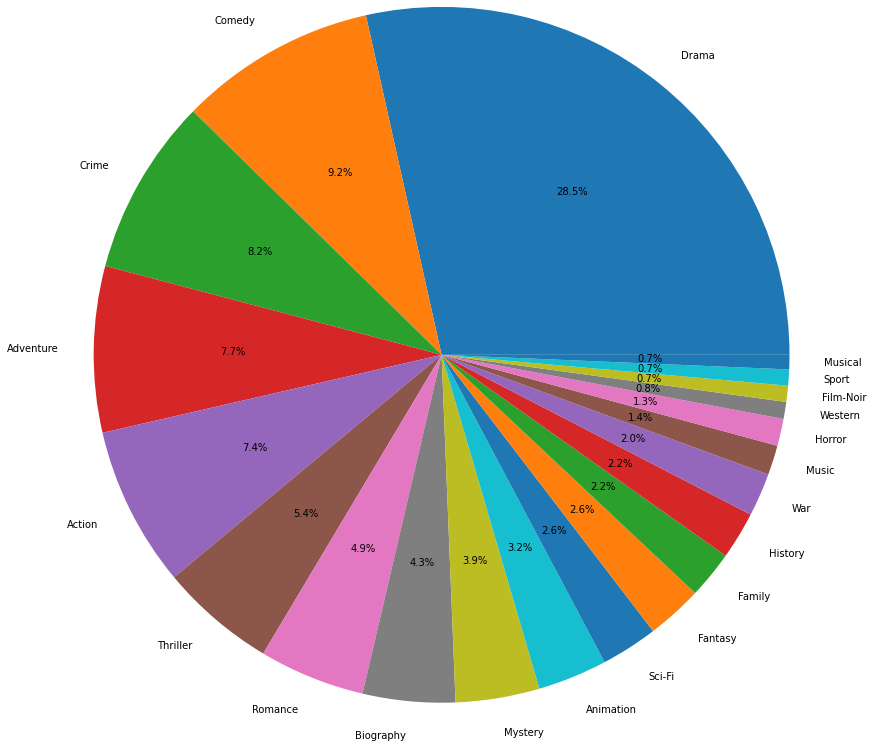

In [10]:
label_headline2 = widgets.HTML(value="<a id='GenreDist'></a><h2>Genre Distribution</h2>")
label_explaination2 = widgets.HTML(value="<p>The pie chart below contains the genre distribution of the dataset used to train the machine learning model. In the future it can also be integrated with movies on the streaming service to analyze the genres that are lacking from it. By analyzing and optimizing what genres of movies to add to the streaming services, it will aid in customer acquisition and retention. </p>")

display(label_headline2)
display(label_explaination2)
dummy = df['Genre'].str.get_dummies(sep=', ')
genre_distribution = dummy.sum().sort_values(ascending=False).index.values
genre_count = dummy.sum().sort_values(ascending=False).values
# fig, (ax1) = plt.subplots(figsize=(21, 15))
# ax1 = plt.pie(genre_distribution, genre_count)
mylabels = ['Drama', 'Comedy', 'Crime', 'Adventure', 'Action', 'Thriller', 'Romance',
 'Biography', 'Mystery', 'Animation', 'Sci-Fi', 'Fantasy', 'Family', 'History',
 'War', 'Music', 'Horror', 'Western', 'Film-Noir', 'Sport', 'Musical']

plt.pie(genre_count, labels = mylabels, radius = 4, autopct='%1.1f%%')
plt.show()

HTML(value="<a id='TopDirector'></a><h2>Top 10 Directors by Gross Earnings</h2>")

HTML(value='<p>The graph below contains the top 10 directors based on their best movie gross earnings. </p>')

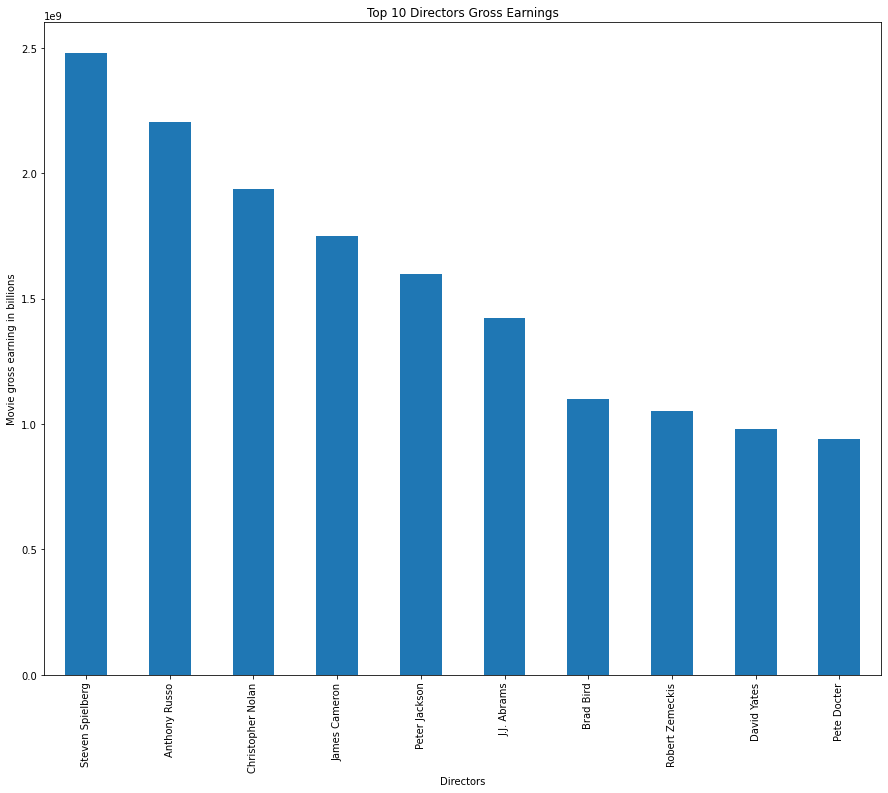

In [11]:
label_headline3 = widgets.HTML(value="<a id='TopDirector'></a><h2>Top 10 Directors by Gross Earnings</h2>")
label_explaination3 = widgets.HTML(value="<p>The graph below contains the top 10 directors based on their best movie gross earnings. </p>")

display(label_headline3)
display(label_explaination3)
gross_by_director = df['Gross'].groupby(df['Director']).sum().sort_values(ascending=False).head(10)
gross_by_director.plot.bar(figsize=(15, 12))
plt.xlabel("Directors")
plt.ylabel("Movie gross earning in billions")
plt.title('Top 10 Directors Gross Earnings')
plt.show()

HTML(value="<a id='IMDB'></a><h2>IMDB Rating Vs. Meta Score by Gross Earnings  </h2>")

HTML(value='<p>The graph below compares the Meta score to the IMDB ratings of the top 15 grossing films.</p>')

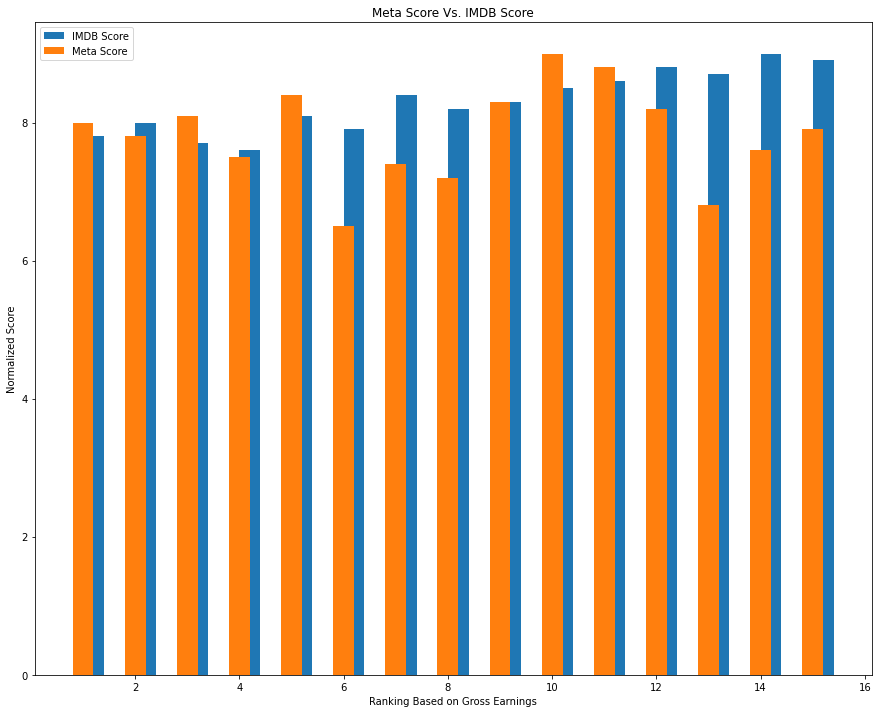

In [17]:
label_headline4 = widgets.HTML(value="<a id='IMDB'></a><h2>IMDB Rating Vs. Meta Score by Gross Earnings  </h2>")
label_explaination4 = widgets.HTML(value="<p>The graph below compares the Meta score to the IMDB ratings of the top 15 grossing films.</p>")
display(label_headline4)
display(label_explaination4)





gross_by_imdb_key = df['Gross'].groupby(df['IMDB_Rating']).sum().sort_values(ascending=False).head(15).index.values
gross_by_meta_key = df['Gross'].groupby(df['Meta_score']).sum().sort_values(ascending=False).head(15).index.values
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
fig, ax = plt.subplots(figsize=(15, 12))
IMDB = ax.bar(x , gross_by_imdb_key,label="IMDB Score", align='edge', width = 0.4)
Meta = ax.bar(x, gross_by_meta_key/10,label="Meta Score", align='center', width = 0.4)
ax.set_xlabel('Ranking Based on Gross Earnings')
ax.set_ylabel('Normalized Score')
ax.set_title('Meta Score Vs. IMDB Score')
ax.legend()
plt.show()


